In [1]:
from sewar.full_ref import psnr, ssim, msssim, vifp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import io

In [2]:
def metrics(model_name,image,size):
    model = [modelname for modelname in os.listdir(model_name) if modelname.startswith('model')]
    p_model = np.zeros(size)
    s_model = np.zeros(size)
    ms_model = np.zeros(size)
    v_model = np.zeros(size)
    for m in range(len(model)):
    
        listname = [levels for levels in os.listdir(model_name+'/'+model[m]) if levels.startswith('level')]
        for l in range(0,len(listname)):
            if os.path.isdir(os.path.join(model_name,model[m],listname[l])):
                orig_path = os.path.join(model_name,model[m],listname[l],image)
                comp_path = os.path.join(model_name,model[m],listname[l],image+'.tfci.png')
                orig_path
                orig = Image.open(orig_path)
                comp = Image.open(comp_path)
                p = psnr(np.asanyarray(orig),np.asanyarray(comp))
                s = ssim(np.asanyarray(orig),np.asanyarray(comp))[0]  # return ssim value, cs value
                ms = msssim(np.asanyarray(orig),np.asanyarray(comp))
                v = vifp(np.asanyarray(orig),np.asanyarray(comp))

                i = orig_path.split('/')[2][-1]
                j = orig_path.split('/')[1][6]

                p_model[int(j)-1,int(i)-1] = p
                s_model[int(j)-1,int(i)-1] = s
                ms_model[int(j)-1,int(i)-1] = ms
                v_model[int(j)-1,int(i)-1] = v
    return p_model,s_model,ms_model,v_model


In [148]:
image = 'kodim01.png'
model_bmshj2018 = 'bmshj2018'
model_mbt2018 = 'mbt2018'
model_hific = 'hific'
model_b2018 = 'b2018'
size_bmshj2018 = [4,8]
size_mbt2018 = [2,8]
size_hific = [3,1]
size_b2018 = [4,4]

In [149]:
p_bmshj2018,s_bmshj2018,ms_bmshj2018,v_bmshj2018 = metrics(model_bmshj2018,image,size_bmshj2018)
p_mbt2018,s_mbt2018,ms_mbt2018,v_mbt2018 = metrics(model_mbt2018,image,size_mbt2018)
p_hific,s_hific,ms_hific,v_hific = metrics(model_hific,image,size_hific)
p_b2018,s_b2018,ms_b2018,v_b2018 = metrics(model_b2018,image,size_b2018)

/Users/vienleih/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


In [150]:
def pillow_encode(img, fmt='jpeg', quality=10):
    tmp = io.BytesIO()
    img.save(tmp, format=fmt, quality=quality)
    tmp.seek(0)
    filesize = tmp.getbuffer().nbytes
    bpp_jpeg = filesize * float(8) / (img.size[0] * img.size[1])
    rec = Image.open(tmp)
    return rec, bpp_jpeg

In [151]:
img = Image.open('images/'+image)
quality = [1,11,20,30,40,55,70,85]
bpp_jpeg=np.zeros((1,8))
p_jpeg=np.zeros((1,8))
s_jpeg=np.zeros((1,8))
ms_jpeg=np.zeros((1,8))
v_jpeg=np.zeros((1,8))

for i in range(len(quality)):
    rec,bpp_jpeg[0][i] = pillow_encode(img,fmt='jpeg',quality=quality[i])
    p_jpeg[0][i] = psnr(np.asanyarray(img),np.asanyarray(rec))
    s_jpeg[0][i] = ssim(np.asanyarray(img),np.asanyarray(rec))[0]
    ms_jpeg[0][i] = msssim(np.asanyarray(img),np.asanyarray(rec))
    v_jpeg[0][i] = vifp(np.asanyarray(img),np.asanyarray(rec))

/Users/vienleih/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


In [140]:
bpp_bmshj2018 = pd.read_csv('bmshj2018/bpp-'+image.split('.')[0]+'.csv')
bpp_mbt2018 = pd.read_csv('mbt2018/bpp-'+image.split('.')[0]+'.csv')
bpp_hific = pd.read_csv('hific/bpp-'+image.split('.')[0]+'.csv')
bpp_b2018 = pd.read_csv('b2018/bpp-'+image.split('.')[0]+'.csv')

x1_bmshj2018 = bpp_bmshj2018.iloc[0,2:10].values.tolist()
x2_bmshj2018 = bpp_bmshj2018.iloc[1,2:10].values.tolist()
x3_bmshj2018 = bpp_bmshj2018.iloc[2,2:10].values.tolist()
x4_bmshj2018 = bpp_bmshj2018.iloc[3,2:10].values.tolist()

x1_mbt2018 = bpp_mbt2018.iloc[0,2:10].values.tolist()
x2_mbt2018 = bpp_mbt2018.iloc[1,2:10].values.tolist()

x1_b2018 = bpp_b2018.iloc[0,2:6].values.tolist()
x2_b2018 = bpp_b2018.iloc[1,2:6].values.tolist()

x_hific_lo = bpp_hific.iloc[0,2]
x_hific_mi = bpp_hific.iloc[1,2]
x_hific_hi = bpp_hific.iloc[2,2]

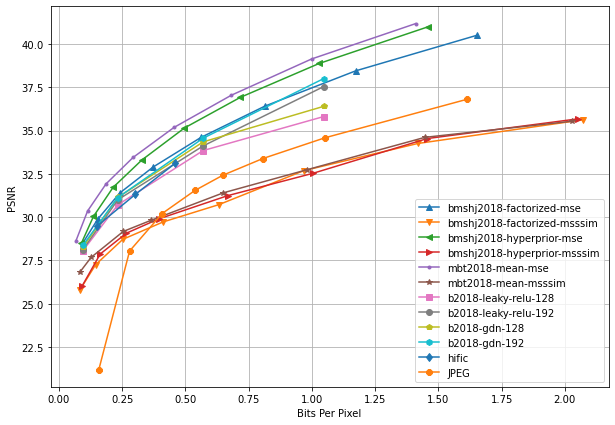

In [144]:
plt.figure(figsize=(10,7))
plt.plot(x1_bmshj2018,p_bmshj2018[0,:],'^-',label='bmshj2018-factorized-mse')
plt.plot(x2_bmshj2018,p_bmshj2018[1,:],'v-',label='bmshj2018-factorized-msssim')
plt.plot(x3_bmshj2018,p_bmshj2018[2,:],'<-',label='bmshj2018-hyperprior-mse')
plt.plot(x4_bmshj2018,p_bmshj2018[3,:],'>-',label='bmshj2018-hyperprior-msssim')
plt.plot(x1_mbt2018,p_mbt2018[0,:],'.-',label='mbt2018-mean-mse')
plt.plot(x2_mbt2018,p_mbt2018[1,:],'*-',label='mbt2018-mean-msssim')

plt.plot(x1_b2018,p_b2018[0,:],'s-',label='b2018-leaky-relu-128')
plt.plot(x1_b2018,p_b2018[1,:],'o-',label='b2018-leaky-relu-192')
plt.plot(x1_b2018,p_b2018[2,:],'p-',label='b2018-gdn-128')
plt.plot(x1_b2018,p_b2018[3,:],'h-',label='b2018-gdn-192')

plt.plot([x_hific_lo,x_hific_mi,x_hific_hi],p_hific,'d-',label='hific')

plt.plot(bpp_jpeg[0,:],p_jpeg[0,:],'8-',label='JPEG')

plt.legend(loc = "best")
plt.xlabel('Bits Per Pixel')
plt.ylabel('PSNR')
plt.grid()
plt.show()

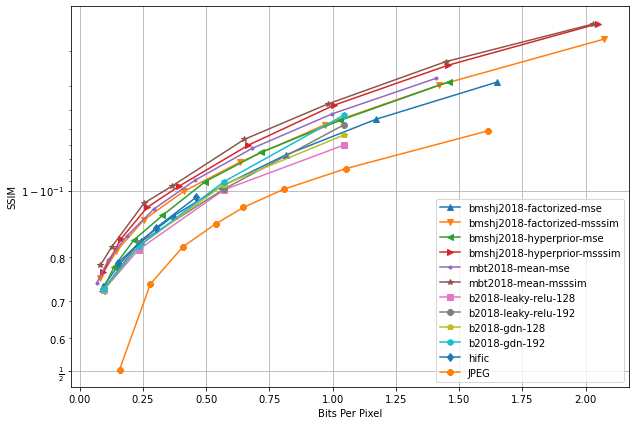

In [145]:
plt.figure(figsize=(10,7))
plt.plot(x1_bmshj2018,s_bmshj2018[0,:],'^-',label='bmshj2018-factorized-mse')
plt.plot(x2_bmshj2018,s_bmshj2018[1,:],'v-',label='bmshj2018-factorized-msssim')
plt.plot(x3_bmshj2018,s_bmshj2018[2,:],'<-',label='bmshj2018-hyperprior-mse')
plt.plot(x4_bmshj2018,s_bmshj2018[3,:],'>-',label='bmshj2018-hyperprior-msssim')
plt.plot(x1_mbt2018,s_mbt2018[0,:],'.-',label='mbt2018-mean-mse')
plt.plot(x2_mbt2018,s_mbt2018[1,:],'*-',label='mbt2018-mean-msssim')

plt.plot(x1_b2018,s_b2018[0,:],'s-',label='b2018-leaky-relu-128')
plt.plot(x1_b2018,s_b2018[1,:],'o-',label='b2018-leaky-relu-192')
plt.plot(x1_b2018,s_b2018[2,:],'p-',label='b2018-gdn-128')
plt.plot(x1_b2018,s_b2018[3,:],'h-',label='b2018-gdn-192')

plt.plot([x_hific_lo,x_hific_mi,x_hific_hi],s_hific,'d-',label='hific')

plt.plot(bpp_jpeg[0,:],s_jpeg[0,:],'8-',label='JPEG')

plt.legend(loc = "best")
plt.xlabel('Bits Per Pixel')
plt.ylabel('SSIM')
plt.yscale('logit')
plt.grid()
plt.show()

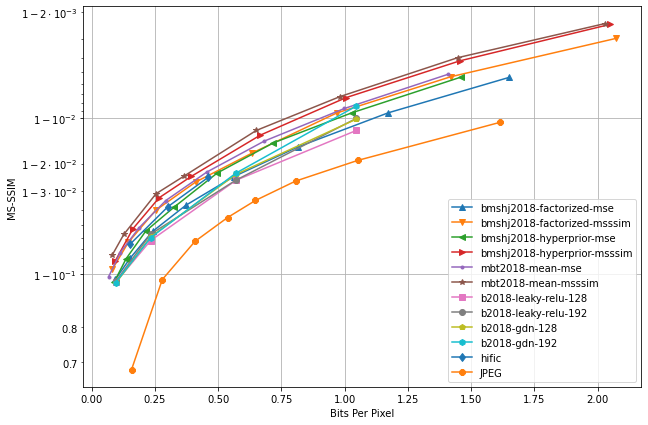

In [146]:
plt.figure(figsize=(10,7))
plt.plot(x1_bmshj2018,ms_bmshj2018[0,:],'^-',label='bmshj2018-factorized-mse')
plt.plot(x2_bmshj2018,ms_bmshj2018[1,:],'v-',label='bmshj2018-factorized-msssim')
plt.plot(x3_bmshj2018,ms_bmshj2018[2,:],'<-',label='bmshj2018-hyperprior-mse')
plt.plot(x4_bmshj2018,ms_bmshj2018[3,:],'>-',label='bmshj2018-hyperprior-msssim')
plt.plot(x1_mbt2018,ms_mbt2018[0,:],'.-',label='mbt2018-mean-mse')
plt.plot(x2_mbt2018,ms_mbt2018[1,:],'*-',label='mbt2018-mean-msssim')

plt.plot(x1_b2018,ms_b2018[0,:],'s-',label='b2018-leaky-relu-128')
plt.plot(x1_b2018,ms_b2018[1,:],'o-',label='b2018-leaky-relu-192')
plt.plot(x1_b2018,ms_b2018[2,:],'p-',label='b2018-gdn-128')
plt.plot(x1_b2018,ms_b2018[3,:],'h-',label='b2018-gdn-192')

plt.plot([x_hific_lo,x_hific_mi,x_hific_hi],ms_hific,'d-',label='hific')

plt.plot(bpp_jpeg[0,:],ms_jpeg[0,:],'8-',label='JPEG')

plt.legend(loc = "best")
plt.xlabel('Bits Per Pixel')
plt.ylabel('MS-SSIM')
plt.yscale('logit')
plt.grid()
plt.show()

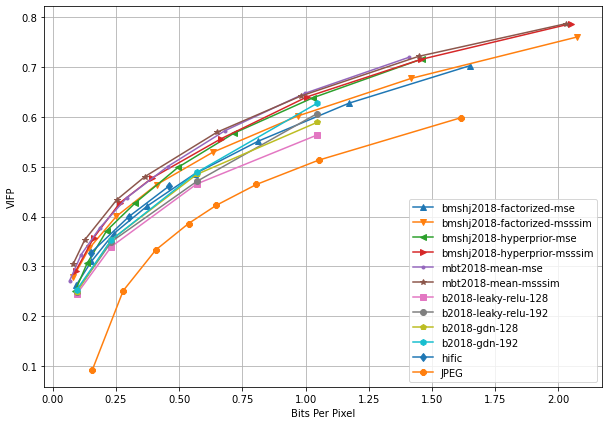

In [147]:
plt.figure(figsize=(10,7))
plt.plot(x1_bmshj2018,v_bmshj2018[0,:],'^-',label='bmshj2018-factorized-mse')
plt.plot(x2_bmshj2018,v_bmshj2018[1,:],'v-',label='bmshj2018-factorized-msssim')
plt.plot(x3_bmshj2018,v_bmshj2018[2,:],'<-',label='bmshj2018-hyperprior-mse')
plt.plot(x4_bmshj2018,v_bmshj2018[3,:],'>-',label='bmshj2018-hyperprior-msssim')
plt.plot(x1_mbt2018,v_mbt2018[0,:],'.-',label='mbt2018-mean-mse')
plt.plot(x2_mbt2018,v_mbt2018[1,:],'*-',label='mbt2018-mean-msssim')

plt.plot(x1_b2018,v_b2018[0,:],'s-',label='b2018-leaky-relu-128')
plt.plot(x1_b2018,v_b2018[1,:],'o-',label='b2018-leaky-relu-192')
plt.plot(x1_b2018,v_b2018[2,:],'p-',label='b2018-gdn-128')
plt.plot(x1_b2018,v_b2018[3,:],'h-',label='b2018-gdn-192')

plt.plot([x_hific_lo,x_hific_mi,x_hific_hi],v_hific,'d-',label='hific')

plt.plot(bpp_jpeg[0,:],v_jpeg[0,:],'8-',label='JPEG')

plt.legend(loc = "best")
plt.xlabel('Bits Per Pixel')
plt.ylabel('VIFP')
plt.grid()
plt.show()